__1.	Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:__

_a.	изменение слоёв и их количества;_

_b.	изменение метода оптимизации;_

_c.	изменение процесса обучения;_

_d.	для продвинутых: преобразование данных._

In [6]:
import torch
import torchvision as tv
import matplotlib.pyplot as plt

In [7]:
transform = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [8]:
train_dataset = tv.datasets.CIFAR10(root='./data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

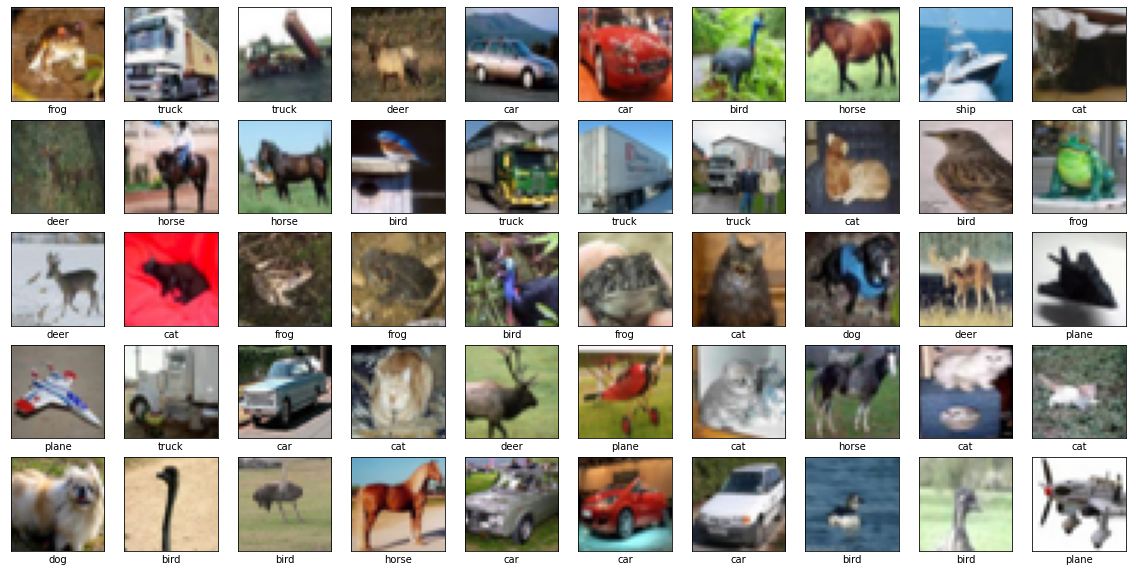

In [10]:
N_img = 50
some_sample = [(train_dataset[itm][0], train_dataset[itm][1]) for itm in range(N_img)]

fig = plt.figure(figsize=(20, 10))
IMG_IN_ROW = 10
for j in range(len(some_sample)):
    ax = fig.add_subplot(N_img//IMG_IN_ROW + 1 if N_img % IMG_IN_ROW else N_img//IMG_IN_ROW, IMG_IN_ROW, j+1)
    ax.imshow(some_sample[j][0].permute(1, 2, 0) / 2 + 0.5)
    plt.xticks([]), plt.yticks([])
    ax.set_xlabel(classes[some_sample[j][1]])
plt.show()

In [11]:
test_dataset = tv.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [12]:
import torch.nn.functional as F
from torch import nn 
from torch import optim

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 2)
        self.conv3 = nn.Conv2d(16, 32, 2)
        self.fc1 = nn.Linear(32 * 3 * 3, 200)
        self.dl = nn.Dropout(0.2)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 32 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dl(x)
        x = F.relu(self.fc2(x))
        x = self.dl(x)
        x = self.fc3(x)
        return x


net = Net()

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 250 == 249:    # печатаем каждые 250 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 250))
            running_loss = 0.0

print('Training is finished!')

[1,   250] loss: 2.304
[1,   500] loss: 2.303
[1,   750] loss: 2.302
[2,   250] loss: 2.302
[2,   500] loss: 2.302
[2,   750] loss: 2.301
[3,   250] loss: 2.301
[3,   500] loss: 2.300
[3,   750] loss: 2.299
[4,   250] loss: 2.298
[4,   500] loss: 2.296
[4,   750] loss: 2.293
[5,   250] loss: 2.286
[5,   500] loss: 2.272
[5,   750] loss: 2.236
[6,   250] loss: 2.139
[6,   500] loss: 2.075
[6,   750] loss: 2.038
[7,   250] loss: 1.979
[7,   500] loss: 1.936
[7,   750] loss: 1.899
[8,   250] loss: 1.868
[8,   500] loss: 1.850
[8,   750] loss: 1.813
[9,   250] loss: 1.790
[9,   500] loss: 1.778
[9,   750] loss: 1.732
[10,   250] loss: 1.724
[10,   500] loss: 1.695
[10,   750] loss: 1.668
[11,   250] loss: 1.663
[11,   500] loss: 1.635
[11,   750] loss: 1.612
[12,   250] loss: 1.595
[12,   500] loss: 1.590
[12,   750] loss: 1.563
[13,   250] loss: 1.548
[13,   500] loss: 1.537
[13,   750] loss: 1.519
[14,   250] loss: 1.495
[14,   500] loss: 1.506
[14,   750] loss: 1.471
[15,   250] loss: 1

In [16]:
data_iter = iter(test_loader)
images, labels = data_iter.next()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

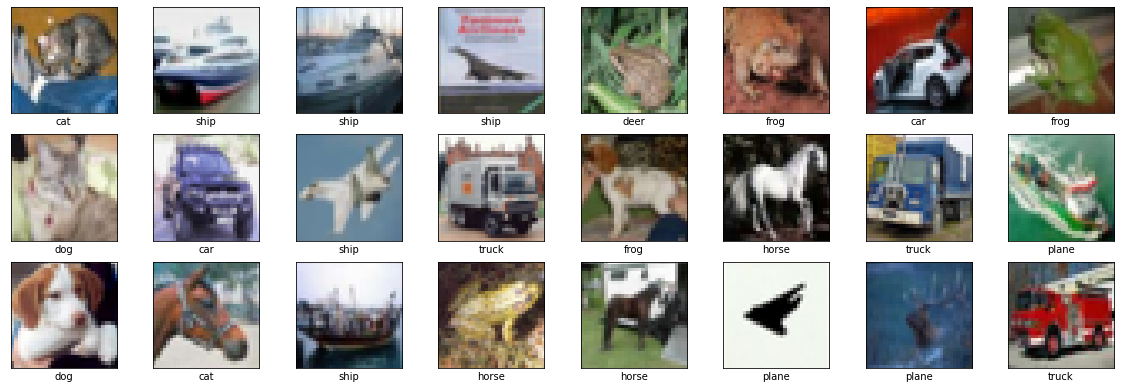

In [17]:
N_img_test = 24

fig = plt.figure(figsize=(20, 16))
IMG_IN_ROW = 8
for j in range(N_img_test):
    ax = fig.add_subplot(N_img//IMG_IN_ROW + 1 if N_img % IMG_IN_ROW else N_img//IMG_IN_ROW, IMG_IN_ROW, j+1)
    ax.imshow(images[j].permute(1, 2, 0) / 2 + 0.5)
    plt.xticks([]), plt.yticks([])
    ax.set_xlabel(classes[predicted[j]])
plt.show()

__2.	Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.__

In [18]:
from torch.autograd import Variable

In [19]:
x = Variable(torch.randn(10), requires_grad = True)
y = Variable(torch.randn(10), requires_grad = False)

linear = nn.Linear(10, 10)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

for epoch in range(10):
    optimizer.zero_grad()
    pred = linear(x)
    loss = criterion(pred, y)
    print(f'epoch: {epoch + 1} - loss: {loss.item()}')
    loss.backward()
    optimizer.step()

print('Training is finished!')

epoch: 1 - loss: 1.1374828815460205
epoch: 2 - loss: 1.1140942573547363
epoch: 3 - loss: 1.0911865234375
epoch: 4 - loss: 1.0687497854232788
epoch: 5 - loss: 1.0467745065689087
epoch: 6 - loss: 1.0252511501312256
epoch: 7 - loss: 1.0041701793670654
epoch: 8 - loss: 0.9835225343704224
epoch: 9 - loss: 0.963299572467804
epoch: 10 - loss: 0.9434925317764282
Training is finished!


__3.	Переписать эту программу на PyTorch:__

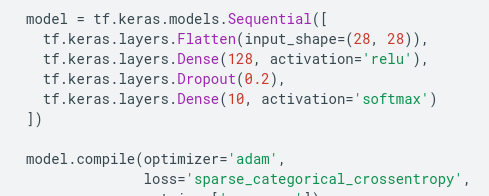

__Не забудьте про реализацию функции forward!__

In [20]:
class PyTorchNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dl = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dl(x)
        x = F.softmax(self.fc2(x))
        return x


net = PyTorchNet()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())